# Task 1

---

## Data Analysis

Perform and plot sentiment analysis and create a word cloud to provide insight into the content of the reviews. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

## Sentiment anaylsis

In [5]:
# Load data
df_cleaned = pd.read_csv("data/BA_reviews_cleaned.csv")

# Perform sentiment analysis
documents = df_cleaned["cleaned_reviews"]
sid = SentimentIntensityAnalyzer()
df_cleaned["sentiment"] = documents.apply(lambda x: sid.polarity_scores(x)["compound"])
df_cleaned = df_cleaned[["sentiment", "cleaned_reviews"]]

# Display sentiments
print(df_cleaned[["sentiment", "cleaned_reviews"]].head())

# Save DataFrame with sentiment scores to CSV
sentiment_csv_filepath = "data/BA_reviews_sentiment.csv"
df_cleaned.to_csv(sentiment_csv_filepath, index=False)
print(f"Data with sentiment scores saved to {sentiment_csv_filepath}")

   sentiment                                    cleaned_reviews
0     0.9690  This was our first flight with British Airways...
1    -0.8855  I recently encountered a highly disappointing ...
2    -0.9474  Beware! BA don't provide any refund due to a v...
3     0.9870  Check in was chaotic and badly organised. Even...
4    -0.4588  All 4 of our flights were fine in terms of com...
Data with sentiment scores saved to data/BA_reviews_sentiment.csv


## Plot sentiment analysis

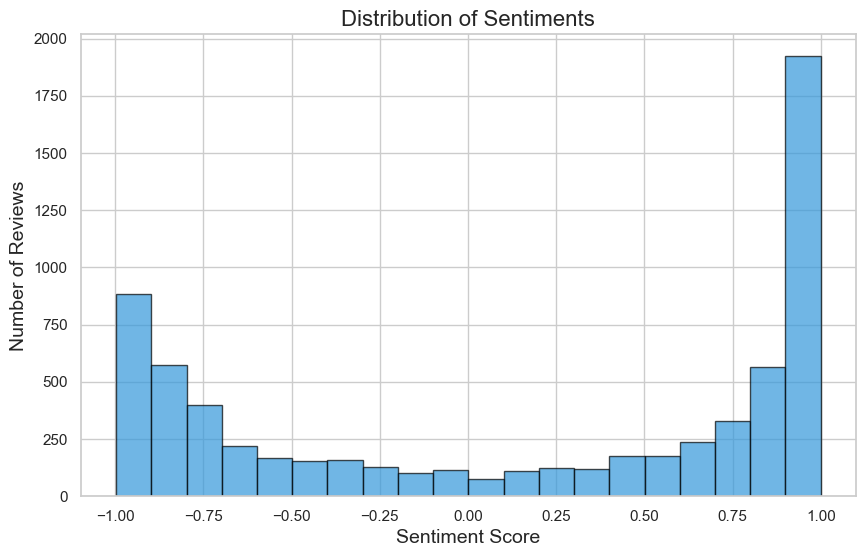

In [6]:
# Load data
df_sentiment = pd.read_csv("data/BA_reviews_sentiment.csv")

# Set seaborn style
sns.set(style="whitegrid")

# Plot bar chart of sentiments
plt.figure(figsize=(10,6))
plt.hist(df_sentiment["sentiment"], bins=20, color='#3498db', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment Score", fontsize = 14)
plt.ylabel("Number of Reviews", fontsize = 14) 

plt.show()


## Create sentiment analysis pie chart

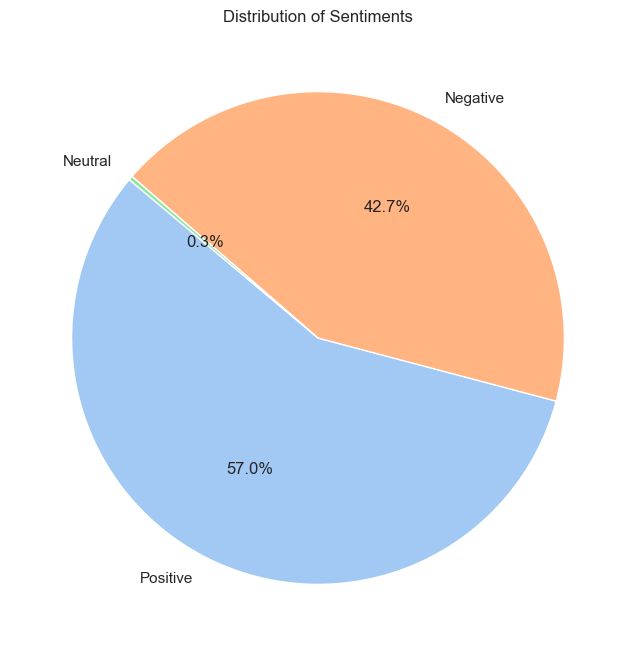

Number of Positive Sentiments: 3830
Number of Neutral Sentiments: 18
Number of Negative Sentiments: 2873


In [7]:
# Define sentiment categories based on score
df_sentiment["sentiment_category"] = df_sentiment["sentiment"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

# Count the number of reviews in each sentiment category
sentiment_counts = df_sentiment["sentiment_category"].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Sentiments")
plt.show()

# Count positive, negative, and neutral sentiments 
sentiment_counts = df_sentiment['sentiment_category'].value_counts()

print("Number of Positive Sentiments:", sentiment_counts['Positive'])
print("Number of Neutral Sentiments:", sentiment_counts['Neutral'])
print("Number of Negative Sentiments:", sentiment_counts['Negative'])

## Create wordcloud

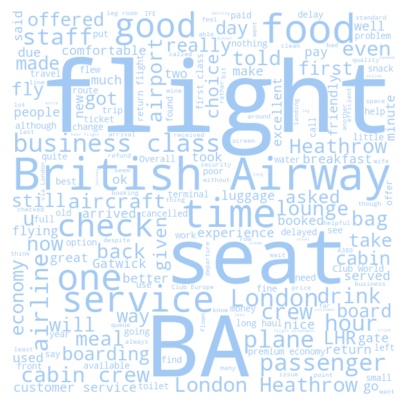

In [8]:
# Load data 
df_cleaned = pd.read_csv("data/BA_reviews_cleaned.csv")

# Make data single string
reviews_text = ' '.join(df_cleaned["cleaned_reviews"])

# Set style
sns.set(style = "whitegrid")

# Define custom color palette
custom_palette = sns.color_palette("pastel")

# Convert palette to RGB values
custom_colors = [(int(r*255), int(g*255), int(b*255)) for r, g, b in custom_palette]

# Generate word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white', colormap='pastel', 
                      color_func=lambda*args, **kwargs: custom_colors[0], random_state=42,
                      contour_color='black', contour_width=1, max_words=200).generate(reviews_text)

# Plot the wordcloud image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Create refined wordcloud

Remove words from wordcloud that do not provide insight into customer experience (ex: BA, British Airways, passenger, flight, etc.), creating a more helpful wordcloud for analysis. 

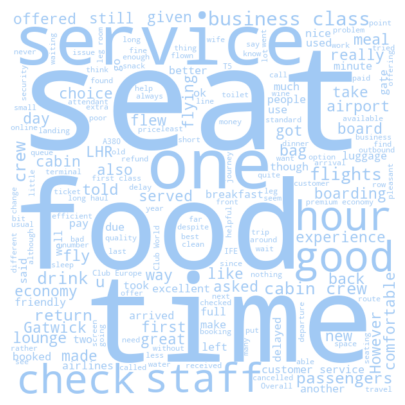

In [9]:
# Specify words to remove
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['ba', 'british', 'airway', 'airways', 'flight', 'plane', 
                'passenger', 'airline', 'london', 'heathrow', 'aircraft', 
                'get', 'could', 'even', 'would'])

# Generate word cloud
wordcloud = WordCloud(width=600, height=600, background_color='white', colormap='pastel', 
                      color_func=lambda*args, **kwargs: custom_colors[0], random_state=42,
                      contour_color='black', contour_width=1, max_words=200, stopwords = custom_stopwords).generate(reviews_text)

# Plot the wordcloud image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Plot wordcloud word frequency

Plot the frequency of important words identified in refined wordcloud to better understand what customers care about.

/var/folders/wt/pw__5jbs0r7081hv16z712dm0000gn/T/ipykernel_46012/2385575233.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word", y="Frequency", data=freq_df.head(20), palette='pastel')


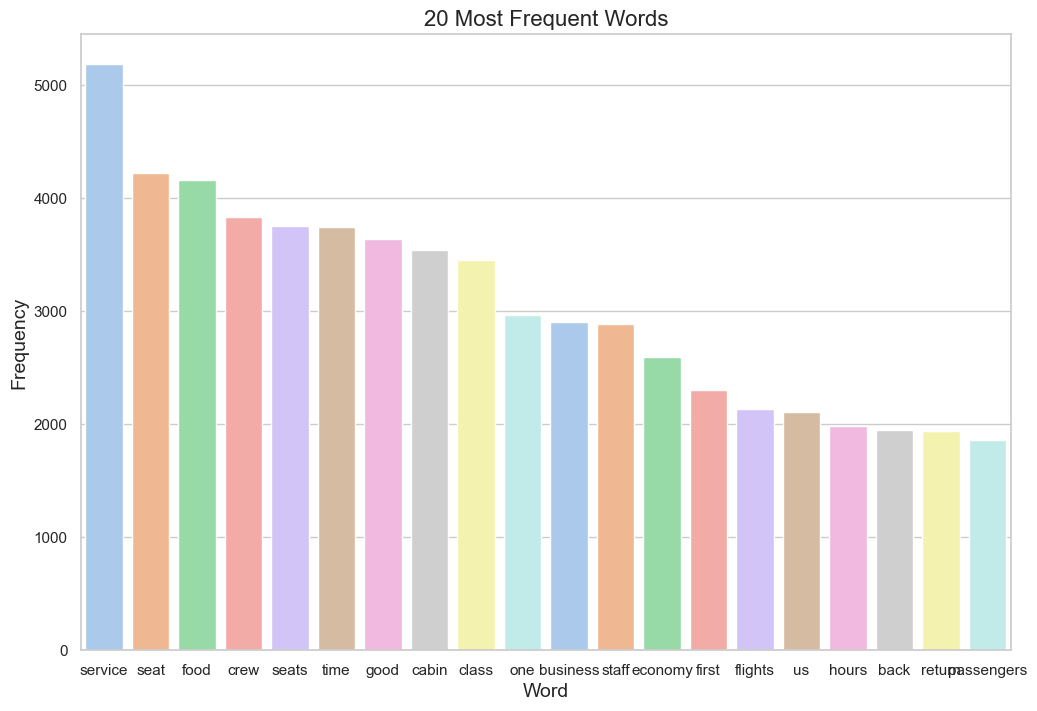

In [10]:
# Tokenize review text
tokens = word_tokenize(reviews_text)

# Remove stopwords
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in custom_stopwords]

# Create a frequency distribution
freq_dist = FreqDist(filtered_tokens)

# Convert the frequency distribution to DataFrame
freq_df = pd.DataFrame(list(freq_dist.items()), columns=["Word", "Frequency"])

# Sort DataFrame by frequency in descending order
freq_df = freq_df.sort_values(by="Frequency", ascending=False)

sns.set(style='whitegrid')

# Plot bar chart
plt.figure(figsize=(12,8))
sns.barplot(x="Word", y="Frequency", data=freq_df.head(20), palette='pastel')
plt.title("20 Most Frequent Words", fontsize = 16)
plt.xlabel("Word", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

## Topic modeling

In [14]:
# Load data
documents = df_cleaned["cleaned_reviews"]

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    topic_name = (f"Topic {i + 1}")
    print(f"{topic_name}: {', '.join(top_words)}")

Topic 1: british, airways, flight, food, economy, london, seats, service, cabin, class
Topic 2: flight, ba, booked, customer, british, seats, airways, seat, service, told
Topic 3: ba, class, business, seat, service, flight, seats, cabin, food, airline
Topic 4: flight, ba, london, staff, check, hours, airways, airport, british, luggage
Topic 5: flight, good, crew, cabin, time, food, service, ba, seat, lounge
